In [70]:
import pickle
import numpy as np
from tqdm.notebook import tqdm
from sklearn.metrics import pairwise_distances
from pathlib import Path
import networkx as nx
from IPython.core.debugger import set_trace
from matplotlib import pyplot as plt
from matplotlib.patches import Patch
%matplotlib widget
import copy
from helper import *
from skimage import io
import cv2
from skimage.color import rgb2gray
from skimage import measure
import seaborn as sns
sns.set()
plt.style.use("default")
import math
%reload_ext autoreload
%aimport helper
%autoreload 1

In [2]:
#trajectories = [('0.56','2.8','1'),('0.56','2.8','2'),('0.56','2.8','3'),('0.56','2.8','4'),('0.56','2.8','5')]
trajectories = [('0.54','2.4','3'),('0.54','2.4','5')]
# trajectories = [('0.52','2.4','1'),('0.52','2.4','3')]
start_slice = 0

In [3]:
vectors = []
visiting_orders = []

for trajectory in trajectories:
    
    phi = trajectory[0]
    chi = trajectory[1]
    replica = trajectory[2]
    
    # load graphs for the trajectory
    graphs = get_graph_from_file(phi, chi, replica)[start_slice:]

    # traverse the graph and create vector
    vector, trajectory_visting_orders = generate_vectors(graphs)
    vectors += vector
    visiting_orders.append(trajectory_visting_orders)

> 80 points loaded from file BR0.54-CHI2.4-R3.file.
> 80 points loaded from file BR0.54-CHI2.4-R5.file.


In [4]:
D = generate_distance_matrix(vectors)

In [68]:
plot_distance_graph(D_sliced, 22, start_slice=20)
# plt.axvline(x=22, c=(0.6,0.6,0.6))
# plt.axvline(x=80+22, c=(0.6,0.6,0.6))

NameError: name 'D_sliced' is not defined

In [71]:
plot_distance_graph(D, 22, start_slice=start_slice)
plt.axvline(x=22, c=(0.6,0.6,0.6))
plt.axvline(x=80+22, c=(0.6,0.6,0.6))

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [72]:
plot_distance_matrix(D)
plt.title("Self Distance Matrix BR0.52-CHI2.4-R1")

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Text(0.5, 1.0, 'Self Distance Matrix BR0.52-CHI2.4-R1')

In [10]:
plot_distance_matrix(D[:60, :60])
plt.title("Self Distance Matrix BR0.52-CHI2.4-R3")

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Text(0.5, 1.0, 'Self Distance Matrix BR0.52-CHI2.4-R3')

In [11]:
plot_distance_matrix(D[:60, 60:])
plt.title("Replica Distance Matrix BR0.52-CHI2.4 [R1,R3]")
plt.ylabel('Points in Trajectory (R1)')
plt.xlabel('Points in Trajectory (R3)')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Text(0.5, 0, 'Points in Trajectory (R3)')

In [73]:
vector_1 = 43
vector_2 = 60+43

In [74]:
padded_vectors = generate_padded_vectors([vectors[vector_1], vectors[vector_2]])
fig, ax = plt.subplots(figsize=(12,2))
ticks = np.arange(0, len(padded_vectors[0]), 20)
minor_ticks = np.arange(0, len(padded_vectors[0]), 5)
ax.set_xticks(ticks)
ax.set_xticks(ticks, minor=True)
ax.set_yticklabels(['',f'vector #{vector_1}', f'vector #{vector_2}'])
plt.grid(True, axis='x', linestyle='-',zorder=0)

plt.setp(ax.get_xminorticklabels(), visible=False)

plt.xlabel("Vector Dimension")
plt.title("Comparing vectors post padding")

legend = [Patch(facecolor=[8/255,46/255,20/255],     edgecolor='k',label='Black Node'),
          Patch(facecolor=[232/255,236/255,236/255], edgecolor='k',label='White Node'),
          Patch(facecolor=[255/255,90/255,95/255],   edgecolor='k',label='Padding')]
plt.legend(handles=legend, bbox_to_anchor=(1,0), loc="lower right", bbox_transform=fig.transFigure, ncol=3)

plt.tight_layout()



for i in range(len(padded_vectors[0])):
    if padded_vectors[0][i]==0:
        c1 = [255/255,90/255,95/255]
    elif padded_vectors[0][i]>0:
        c1 = [232/255,236/255,236/255]
    else:
        c1 = [8/255,46/255,20/255]
        
    if padded_vectors[1][i]==0:
        c2 = [255/255,90/255,95/255]
    elif padded_vectors[1][i]>0:
        c2 = [232/255,236/255,236/255]
    else:
        c2 = [8/255,46/255,20/255]
        
    color=[c1,c2]
    plt.barh([0,1], [1,1], left=i, color=color, height=0.75, orientation='horizontal',zorder=3)
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [45]:
vector_1 = 63
vector_2 = 80+63

In [46]:
padded_vectors = generate_padded_vectors([vectors[vector_1], vectors[vector_2]])
fig, ax = plt.subplots(figsize=(12,2))
ticks = np.arange(0, len(padded_vectors[0]), 20)
minor_ticks = np.arange(0, len(padded_vectors[0]), 5)
ax.set_xticks(ticks)
ax.set_xticks(ticks, minor=True)
ax.set_yticklabels(['',f'vector #{vector_1}', f'vector #{vector_2}'])
plt.grid(True, axis='x', linestyle='-',zorder=0)

plt.setp(ax.get_xminorticklabels(), visible=False)

plt.xlabel("Vector Dimension")
plt.title("Comparing vectors post padding")

legend = [Patch(facecolor=[8/255,46/255,20/255],     edgecolor='k',label='Black Node'),
          Patch(facecolor=[232/255,236/255,236/255], edgecolor='k',label='White Node'),
          Patch(facecolor=[255/255,90/255,95/255],   edgecolor='k',label='Padding')]
plt.legend(handles=legend, bbox_to_anchor=(1,0), loc="lower right", bbox_transform=fig.transFigure, ncol=3)

plt.tight_layout()



for i in range(len(padded_vectors[0])):
    if padded_vectors[0][i]==0:
        c1 = [255/255,90/255,95/255]
    elif padded_vectors[0][i]>0:
        c1 = [232/255,236/255,236/255]
    else:
        c1 = [8/255,46/255,20/255]
        
    if padded_vectors[1][i]==0:
        c2 = [255/255,90/255,95/255]
    elif padded_vectors[1][i]>0:
        c2 = [232/255,236/255,236/255]
    else:
        c2 = [8/255,46/255,20/255]
        
    color=[c1,c2]
    plt.barh([0,1], [1,1], left=i, color=color, height=0.75, orientation='horizontal',zorder=3)
plt.show()

TypeError: only integer scalar arrays can be converted to a scalar index

Trying to plot the order of traversal on the image
Steps
- Read nth and mth image
- grayscale and label the image
- for every node in the traversed image 
  - search the label number in the labelled image
  - write the index number at the location of the labelled image

#### Read the nth and mth image

In [5]:
image_1_index = 63
image_2_index = 63

trajectory_1 = 'BR0.54-CHI2.4-R3'
trajectory_2 = 'BR0.54-CHI2.4-R5'

image_1_path = Path(f"/home/namit/codes/Entropy-Isomap/outputs/images_square/{trajectory_1}/{image_1_index}.png")
image_2_path = Path(f"/home/namit/codes/Entropy-Isomap/outputs/images_square/{trajectory_2}/{image_2_index}.png")

image_1 = io.imread(image_1_path)
image_2 = io.imread(image_2_path)

#### create label image

In [6]:
gray_img_1 = rgb2gray(image_1)
thresh_img_1 = gray_img_1 > 0.5
label_img_1 = measure.label(thresh_img_1, background=-1)
#regions_1 = measure.regionprops(label_img_1, thresh_img_1)

gray_img_2 = rgb2gray(image_2)
thresh_img_2 = gray_img_2 > 0.5
label_img_2 = measure.label(thresh_img_2, background=-1)
#regions_2 = measure.regionprops(label_img_2, thresh_img_2)

#### plot visiting order of trajectory 1

In [7]:
visiting_order_1, visiting_order_2 = visiting_orders[0][image_1_index], visiting_orders[1][image_2_index]

vector_1, vector_2 = vectors[image_1_index], vectors[80+image_2_index]
padded_vector_1, padded_vector_2 = generate_padded_vectors([vector_1, vector_2])

In [48]:
fig = plt.figure(figsize=(60,30))

pointer = 0
for index, ratio in enumerate(padded_vector_1[:]):
    node_image = np.ones(image_1.shape)
    
    if ratio != 0:
        node_index = visiting_order_1[pointer]
        node_image = label_img_1 != node_index
        pointer += 1
    
    ax = fig.add_subplot((len(padded_vector_1)//15)+1,15,index+1)
    
    ax.imshow(node_image, cmap='gray')
    
    ax.set_title(f"Node #{index}")
    
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)


plt.tight_layout()
plt.savefig(f"/home/namit/codes/Entropy-Isomap/outputs/debug/nodes/{trajectory_1}.jpg")

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

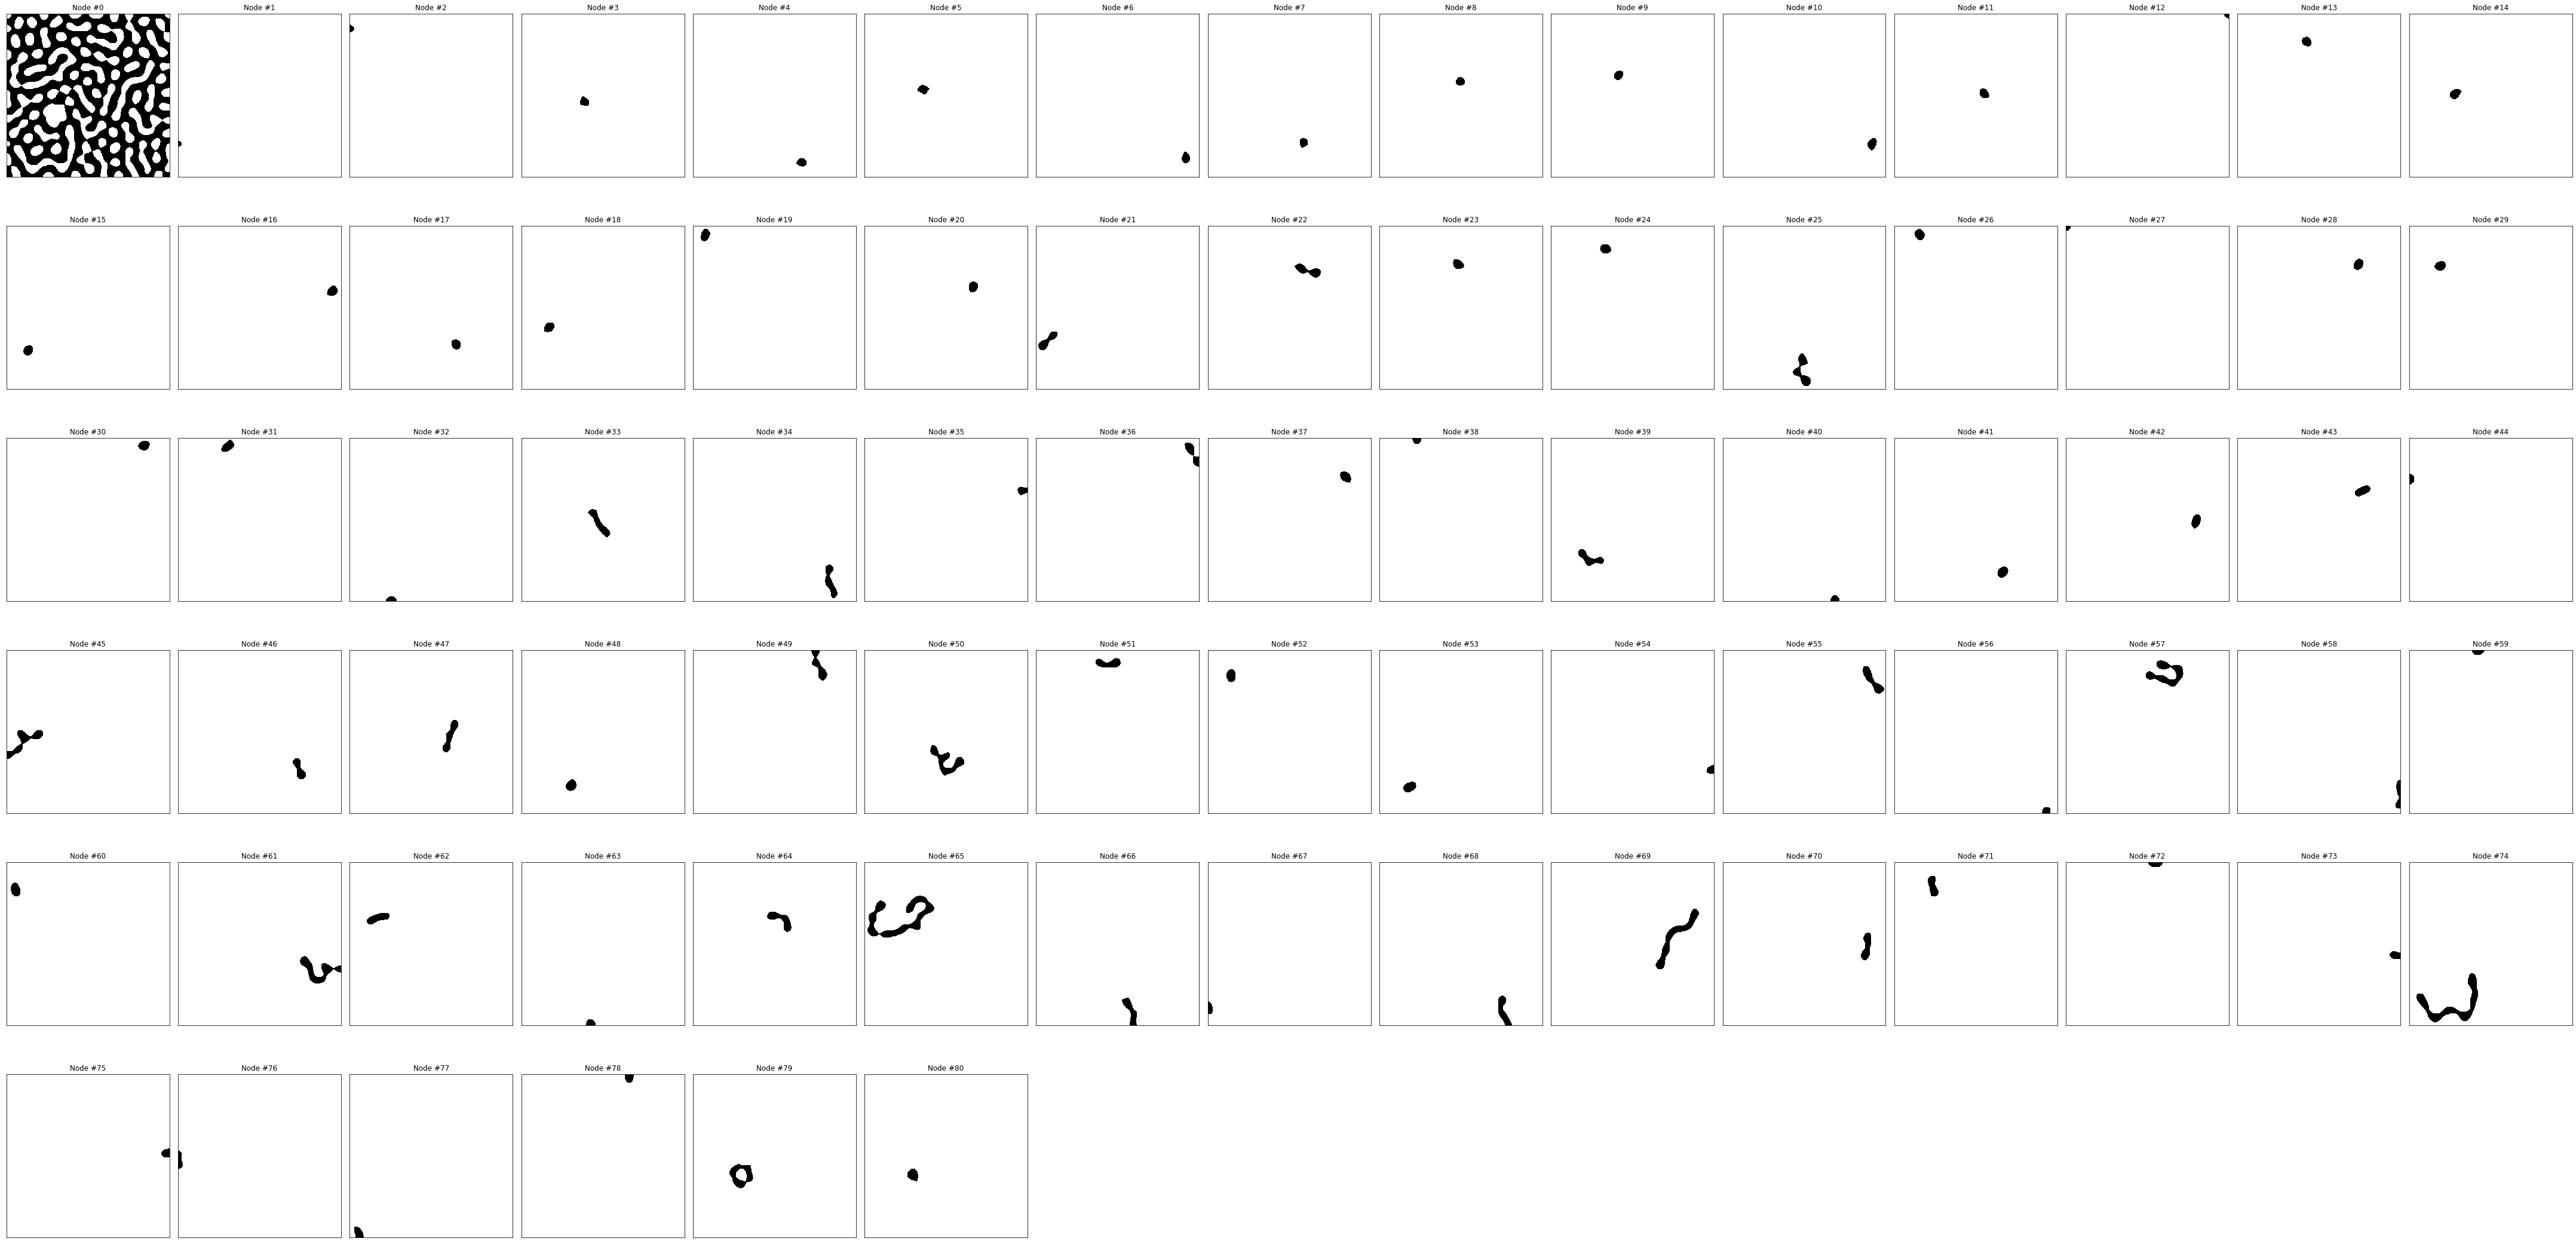

In [66]:
fig = plt.figure(figsize=(60,30))

pointer = 0
for index, ratio in enumerate(padded_vector_2[:]):
    node_image = np.zeros(image_2.shape)
    
    if ratio != 0:
        node_index = visiting_order_2[pointer]
        node_image = label_img_2 != node_index
        pointer += 1
    
    ax = fig.add_subplot((len(padded_vector_2)//15)+1,15,index+1)
    
    ax.imshow(node_image, cmap='gray')
    
    ax.set_title(f"Node #{index}")
    
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)


plt.tight_layout()
plt.savefig(f"/home/namit/codes/Entropy-Isomap/outputs/debug/nodes/{trajectory_2}.jpg")

#### Plot visiting order along with dimension distance

In [60]:
l1_distances = []
for i in range(len(padded_vector_1)):
    q1 = padded_vector_1[i]
    q2 = padded_vector_2[i]
    
    l1_distances.append(np.abs(np.abs(q1)-np.abs(q2)))

print(len(l1_distances))
l1_distances = l1_distances[1:]
# normalize l1_distances
l1_distances_norm = (l1_distances - min(l1_distances)) / (max(l1_distances) - min(l1_distances))
print(l1_distances_norm.shape)
l1_distances_norm = np.insert(l1_distances_norm,0,1)
print(l1_distances_norm.shape)

81
(80,)
(81,)


In [79]:
fig = plt.figure()

ax = fig.add_subplot(121)
ax.plot(padded_vector_1[1:])

ax = fig.add_subplot(122)
ax.plot(padded_vector_2[1:])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [82]:
plt.figure()

plt.plot(np.abs(padded_vector_1[1:]-padded_vector_2[1:]))

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

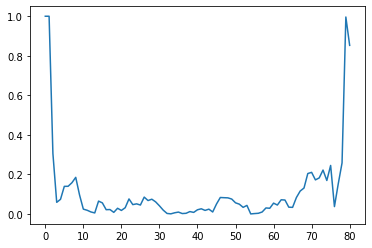

In [56]:
plt.figure()
plt.plot(l1_distances_norm)

In [59]:
a = node_image.astype(int)

In [76]:
fig = plt.figure(figsize=(60,30))

pointer = 0
for index, ratio in enumerate(padded_vector_1[:]):
    node_image = np.zeros(image_1.shape)
    
    if ratio != 0:
        node_index = visiting_order_1[pointer]
        node_image = label_img_1 != node_index
        pointer += 1
    
    ax = fig.add_subplot((len(padded_vector_1)//15)+1,15,index+1)
    
    # convert image to 3 channel and add shades of yellow
    node_image = node_image.astype(int)
    anti_yellow_intensity = 1-l1_distances_norm[index]
    node_image_yellow = np.stack([node_image, node_image, node_image*anti_yellow_intensity], axis=2)
    
    
    ax.imshow(node_image_yellow)
    
    ax.set_title(f"Node #{index}")
    
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)


plt.tight_layout()
plt.savefig(f"/home/namit/codes/Entropy-Isomap/outputs/debug/nodes/{trajectory_1}.jpg")


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [75]:
fig = plt.figure(figsize=(60,30))

pointer = 0
for index, ratio in enumerate(padded_vector_2[:]):
    node_image = np.zeros(image_2.shape)
    
    if ratio != 0:
        node_index = visiting_order_2[pointer]
        node_image = label_img_2 != node_index
        pointer += 1
    
    ax = fig.add_subplot((len(padded_vector_2)//15)+1,15,index+1)
    
    # convert image to 3 channel and add shades of yellow
    node_image = node_image.astype(int)
    anti_yellow_intensity = 1-l1_distances_norm[index]
    node_image_yellow = np.stack([node_image, node_image, node_image*anti_yellow_intensity], axis=2)
    
    
    ax.imshow(node_image_yellow)
    
    ax.set_title(f"Node #{index}")
    
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)


plt.tight_layout()
plt.savefig(f"/home/namit/codes/Entropy-Isomap/outputs/debug/nodes/{trajectory_2}.jpg")


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [45]:
a = node_image
anti_yellow_intensity = 1-l1_distances[-1]

b = np.stack([a,a,a*anti_yellow_intensity],axis=2)

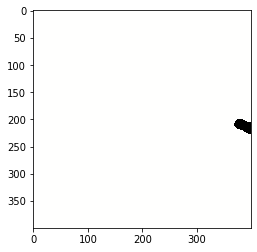

In [46]:
plt.figure()
plt.imshow(b)
plt.figure().clear()
plt.close()

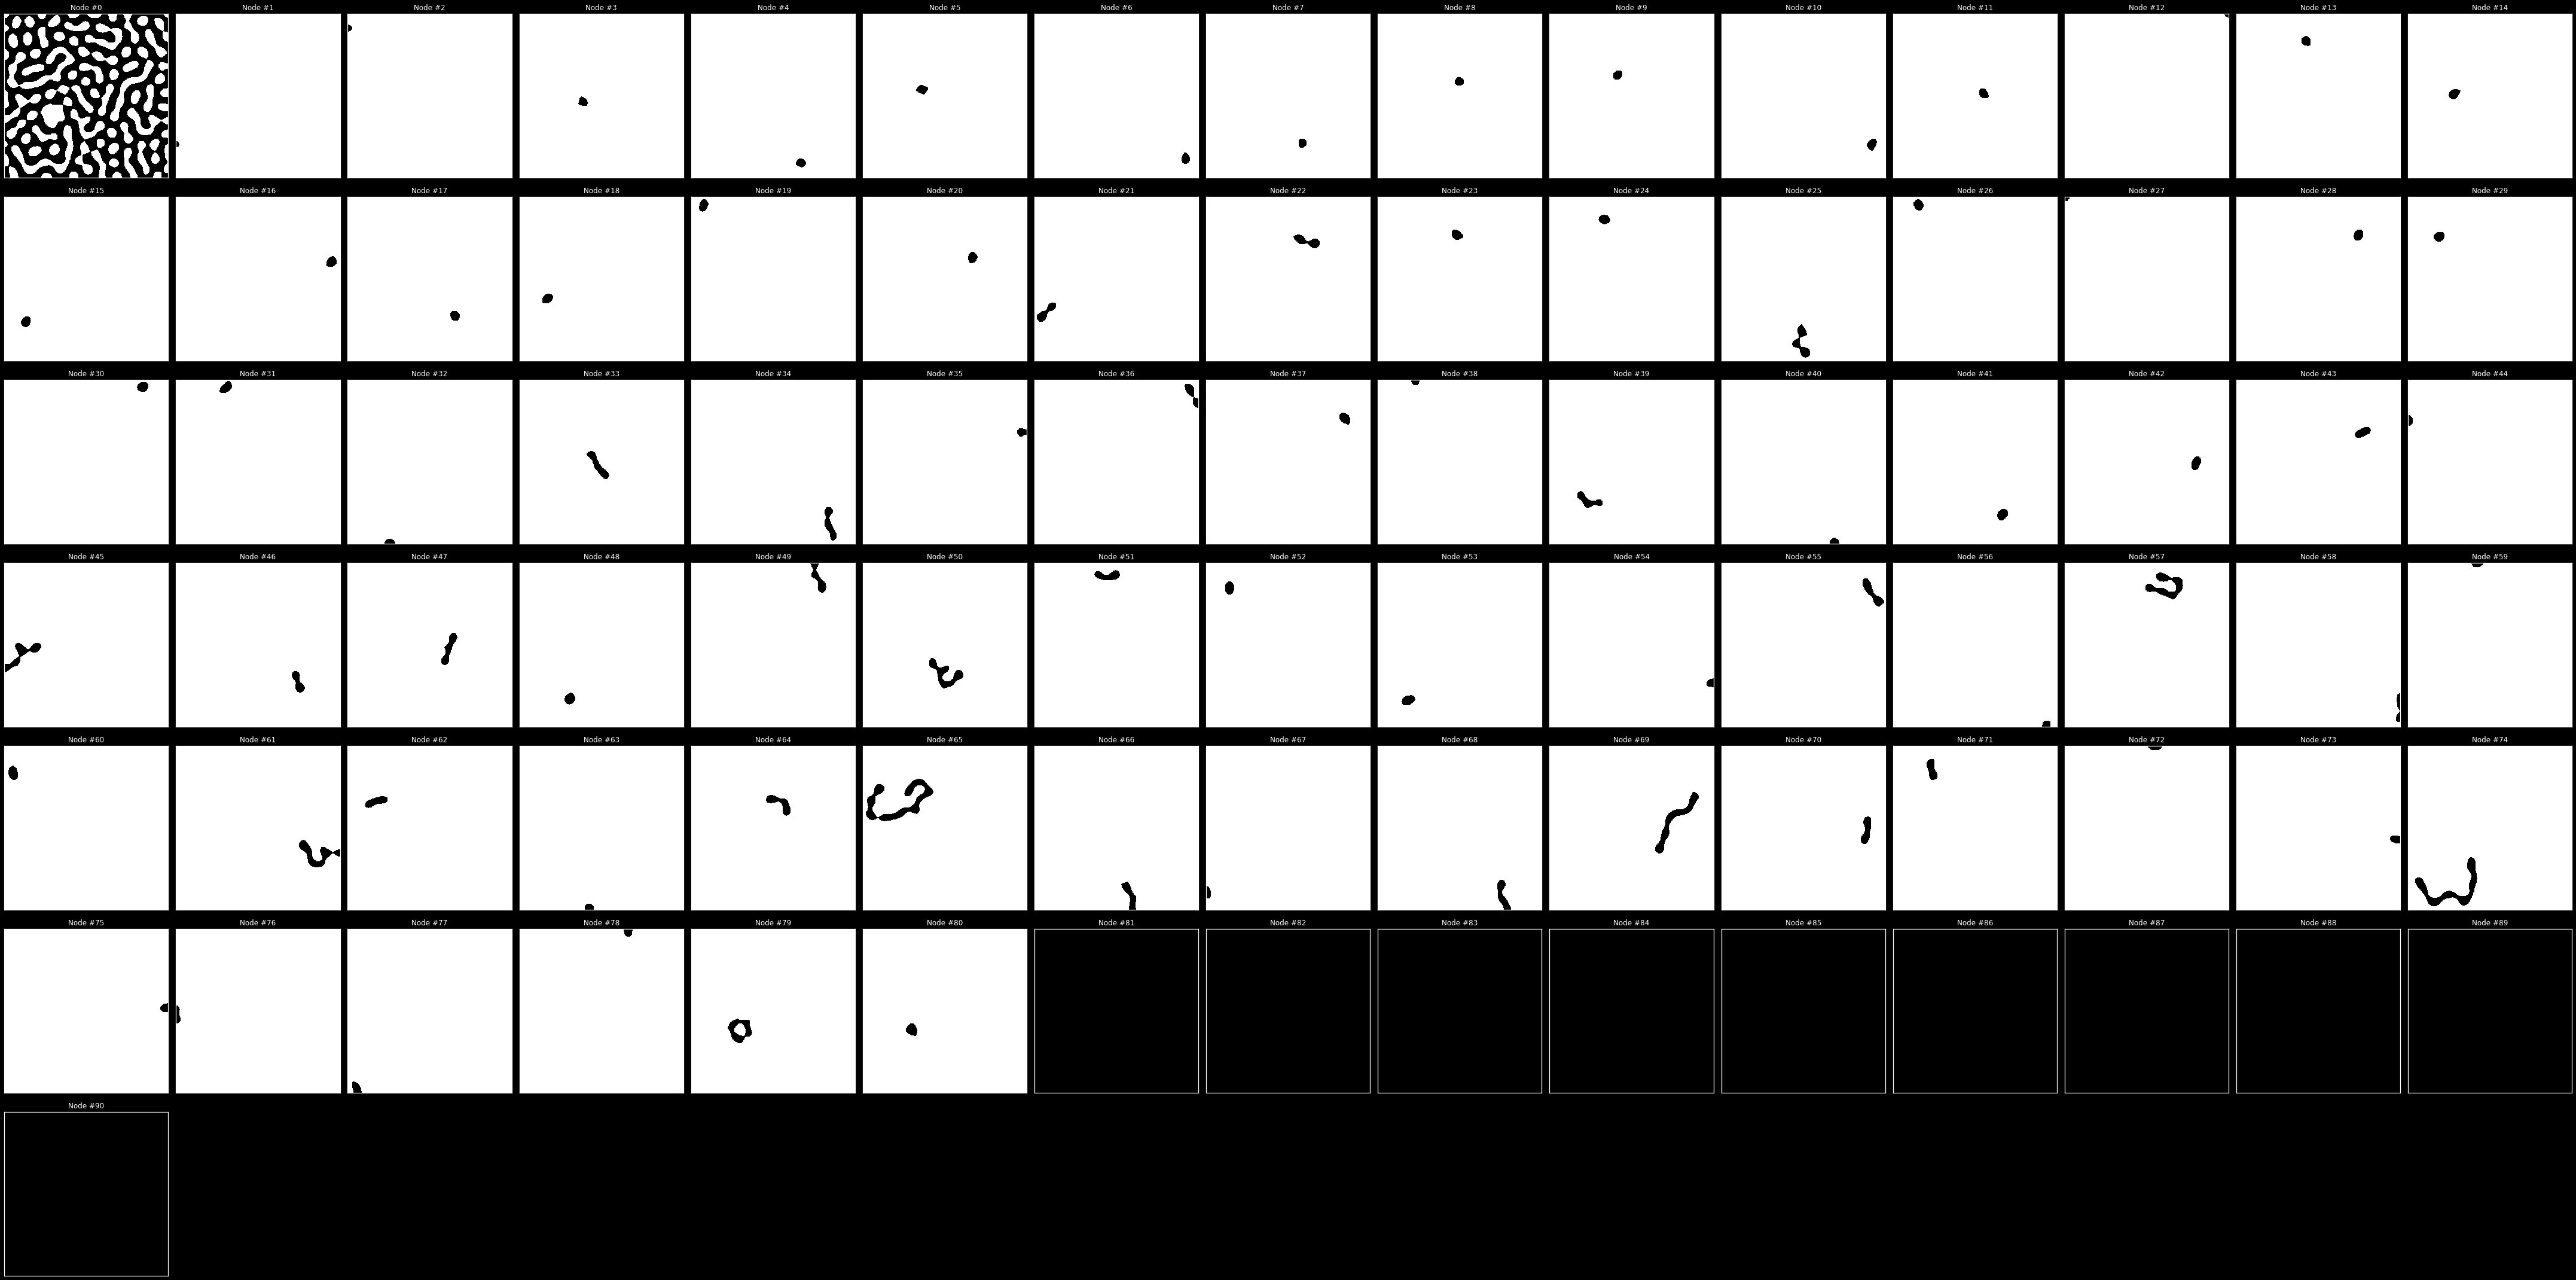

In [26]:
fig = plt.figure(figsize=(60,30))

pointer = 0
for index, ratio in enumerate(padded_vector_2[:]):
    node_image = np.zeros(image_2.shape)
    
    if ratio != 0:
        node_index = visiting_order_2[pointer]
        node_image = label_img_2 != node_index
        pointer += 1
    
    ax = fig.add_subplot((len(padded_vector_2)//15)+1,15,index+1)
    
    ax.imshow(node_image, cmap='gray')
    
    ax.set_title(f"Node #{index}")
    
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)


plt.tight_layout()
plt.savefig(f"/home/namit/codes/Entropy-Isomap/outputs/debug/nodes/{trajectory_2}.jpg")